# K Nearest Neigbors (KNN)

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier


In [142]:
def scaled_down(my_df,SCALE_VALUE):
    import numpy as np
    x = my_df.to_numpy()
    m, n = x.shape
    MIN = np.zeros(n)
    MAX = np.zeros(n)
    
    for i in np.arange(n):
        MIN[i] = np.min(x[:,i])
        MAX[i] = np.max(x[:,i])
    
    pend = (SCALE_VALUE-(-SCALE_VALUE)) / (MAX - MIN)
    y = np.zeros([m,n])

    for j in np.arange(n):
        for k in np.arange(m):
            y[k,j] = pend[j]*(x[k,j] - MIN[j])-SCALE_VALUE
    return y, pend, SCALE_VALUE

### Import the file

In [143]:
customers = pd.read_csv('loans.csv')
customers.head()

,age,amount,default
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0


### Step 1: EDA

In [144]:
customers.describe()

,age,amount,default
count,200.000000,200.000000,200.000000
mean,37.280000,289946.670000,0.835000
std,9.148776,137945.585277,0.372112
min,18.000000,100000.000000,0.000000
25%,29.000000,172966.500000,1.000000
50%,37.500000,276234.000000,1.000000
75%,45.000000,394574.500000,1.000000
max,57.000000,596771.000000,1.000000


In [145]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      200 non-null    int64
 1   amount   200 non-null    int64
 2   default  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [146]:
default = customers[customers['default'] == 0]
no_default = customers[customers['default'] == 1]
print(default.head())
print(no_default.head())

   age  amount  default
0   18  363112        0
2   20  239072        0
3   22  195265        0
4   22  482174        0
5   23  468815        0
    age  amount  default
1    19  477965        1
6    23  583565        1
7    24  100000        1
8    24  199272        1
13   25  195341        1


In [147]:
default.max()

age            57
amount     596771
default         0
dtype: int64

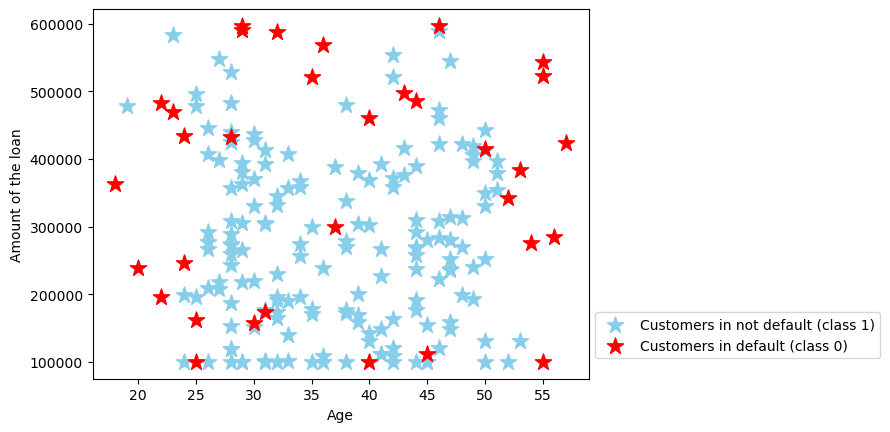

In [148]:
# Show the customer in default and non-default
plt.scatter(no_default['age'], no_default['amount'],
           marker="*", s=150, color= "skyblue",
           label = "Customers in not default (class 1)")

plt.scatter(default['age'], default['amount'],
           marker="*", s=150, color= "red",
           label = "Customers in default (class 0)")

plt.ylabel("Amount of the loan")
plt.xlabel("Age")
plt.legend(bbox_to_anchor = (1, 0.2))
plt.show()

### Step 2: Preprocessing - Scaling or Normalization

In [149]:
# Data to train
X = customers[['age', 'amount']]
y = customers['default']

scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X)
print(X_train_scaled[0:5,:])

# We will test with a potential customer:
new_customer_age = 40
new_customer_amount = 350_000
new_customer = [[new_customer_age, new_customer_amount]]
print(new_customer)
new_customer_scaled = scaler.fit_transform(X_test)
print(new_customer_scaled)

[[0.         0.52964444]
 [0.02564103 0.76084353]
 [0.05128205 0.27995193]
 [0.1025641  0.19176844]
 [0.1025641  0.76931624]]
[[40, 350000]]
[[0. 0.]]


### Step 3: Split the data between train and test

In [150]:
# Train Test Split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
# print ('Train set:', X_train.shape,  y_train.shape)
# print ('Test set:', X_test.shape,  y_test.shape)


### Step 4: Choose and Set-up the algorithm

In [151]:
# K Nearest Neighbors (KNN)
k = 3
classifier = KNeighborsClassifier(n_neighbors=k)

### Step 5: Train the model

In [152]:
classifier.fit(X_train_scaled, y)
classifier

KNeighborsClassifier(n_neighbors=3)

### Step 6: Predict with test values

Class [1]
Probability [[0.33333333 0.66666667]]


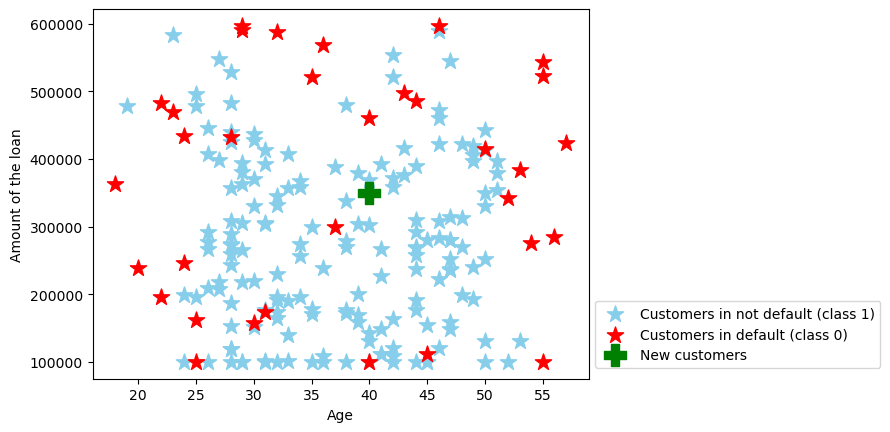

In [153]:
yhat = classifier.predict(new_customer_scaled)
print("Class", yhat)
print("Probability", classifier.predict_proba(new_customer_scaled))

# Graph
plt.scatter(no_default['age'], no_default['amount'],
           marker="*", s=150, color= "skyblue",
           label = "Customers in not default (class 1)")

plt.scatter(default['age'], default['amount'],
           marker="*", s=150, color= "red",
           label = "Customers in default (class 0)")

plt.scatter(new_customer_age, new_customer_amount,
           marker="P", s=250, color= "green",
           label = "New customers")

plt.ylabel("Amount of the loan")
plt.xlabel("Age")
plt.legend(bbox_to_anchor = (1, 0.23))
plt.show()

### Step 7: Evaluate the accuracy

In [154]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(np.ones(1), yhat))

Test set Accuracy:  1.0


### Graph regions

In [211]:
# Syntetic data for new customer asking for a loan:
loan_amounts = np.array([np.arange(100_000, 600_010, 1000)]*43).reshape(-1,1)
customer_ages = np.array([np.arange(18,61)]*501).reshape(-1,1)
data = np.hstack((customer_ages, loan_amounts))
asking_for_loan = pd.DataFrame(data, columns=['age', 'amount'])
print(asking_for_loan.head())

# Scaling
asking_for_loan_scaled = scaler.fit_transform(asking_for_loan)
print(asking_for_loan_scaled[0:5,:])
# Predict
yhat = classifier.predict(asking_for_loan_scaled)

   age  amount
0   18  100000
1   19  101000
2   20  102000
3   21  103000
4   22  104000
[[0.         0.        ]
 [0.02380952 0.002     ]
 [0.04761905 0.004     ]
 [0.07142857 0.006     ]
 [0.0952381  0.008     ]]


In [212]:
print(output_classes[yhat == 1].sum())
print(output_classes[yhat == 0].sum())

12146
3639


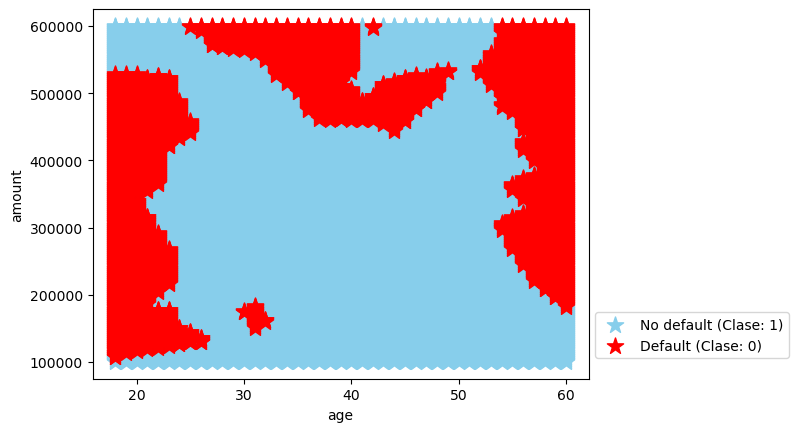

In [213]:

#Código para graficar
good_ones = asking_for_loan[yhat==1]
bad_ones  = asking_for_loan[yhat==0]
plt.scatter(good_ones["age"], good_ones["amount"],
            marker="*", s=150, color="skyblue", label="No default (Clase: 1)")
plt.scatter(bad_ones["age"], bad_ones["amount"],
            marker="*", s=150, color="red", label="Default (Clase: 0)")
plt.ylabel("amount")
plt.xlabel("age")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

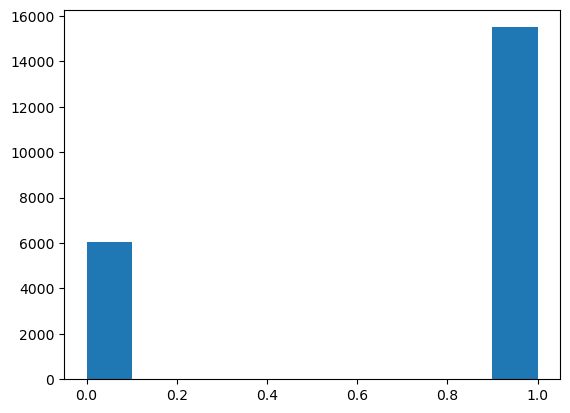

In [214]:
plt.hist(yhat)
plt.show()

In [215]:
print("Class", yhat)
probability = classifier.predict_proba(asking_for_loan_scaled)
print("Probability", probability)

Class [1 1 1 ... 0 0 0]
Probability [[0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 ...
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]]


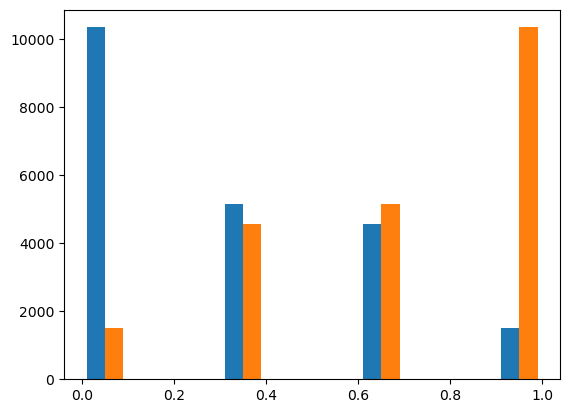

In [222]:
# Probability
plt.hist(classifier.predict_proba(asking_for_loan_scaled))
plt.show()

In [217]:
approved = asking_for_loan[yhat == 1]
denied   = asking_for_loan[yhat == 0]

In [218]:
print(approved)

       age  amount
0       18  100000
1       19  101000
2       20  102000
3       21  103000
4       22  104000
...    ...     ...
21531   49  589000
21532   50  590000
21533   51  591000
21534   52  592000
21535   53  593000

[15496 rows x 2 columns]


In [219]:
print(denied)

       age  amount
43      18  143000
44      19  144000
45      20  145000
46      21  146000
47      22  147000
...    ...     ...
21538   56  596000
21539   57  597000
21540   58  598000
21541   59  599000
21542   60  600000

[6047 rows x 2 columns]


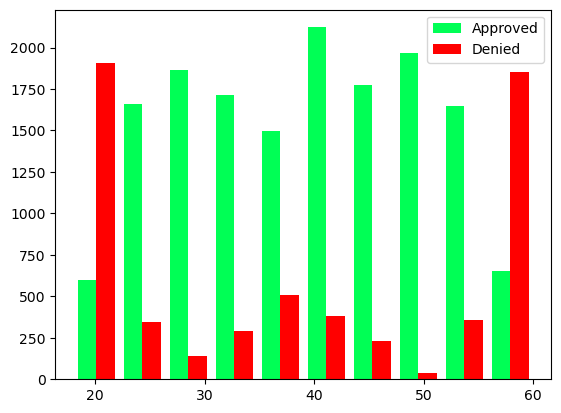

In [250]:
plt.hist([approved['age'], denied['age']], label=['Approved','Denied'], color=['#00ff55', '#ff0000']) 
plt.legend()
plt.show()

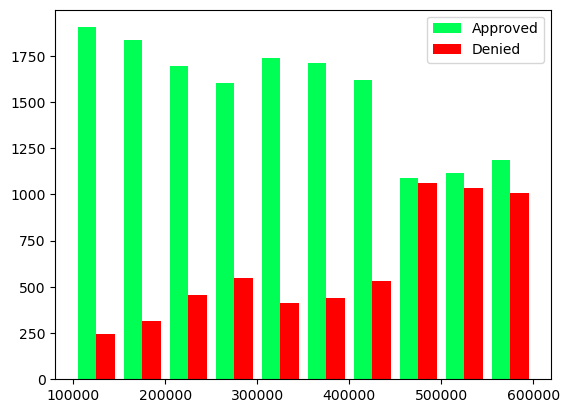

In [251]:
plt.hist([approved['amount'], denied['amount']], label=['Approved','Denied'], color=['#00ff55', '#ff0000']) 
plt.legend()
plt.show()